In [1]:
from pydub import AudioSegment
from pydub.silence import split_on_silence

In [2]:
import malaya_speech
import numpy as np
import librosa
from malaya_speech import Pipeline

2021-11-07 14:20:03.162227: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-07 14:20:03.162288: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
/home/marchel/.local/lib/python3.8/site-packages/malaya_boilerplate/frozen_graph.py:27: UserWarning: Cannot import beam_search_ops from Tensorflow Addons, `deep_model` for stemmer will not available to use, make sure Tensorflow Addons version >= 0.12.0
  warnings.warn(


In [3]:
#sr is sample rate
y, sr = malaya_speech.load('Test.wav')
len(y) / sr

6.27

In [4]:
import matplotlib.pyplot as plt
import IPython.display as ipd

In [5]:
ipd.Audio(y, rate = sr)

In [6]:
import matplotlib.pyplot as plt

In [7]:
def norm_mel(y, sr):
    mel = librosa.feature.melspectrogram(y, sr = sr, n_mels = 80)
    return np.log10(np.maximum(mel, 1e-10)).T

def plot(y, sr):
    mel = norm_mel(y, sr)
    fig, axs = plt.subplots(2, figsize=(10, 8))
    axs[0].plot(y)
    im = axs[1].imshow(np.rot90(mel), aspect='auto', interpolation='none')
    fig.colorbar(mappable=im, shrink=0.65, orientation='horizontal', ax=axs[1])
    plt.show()

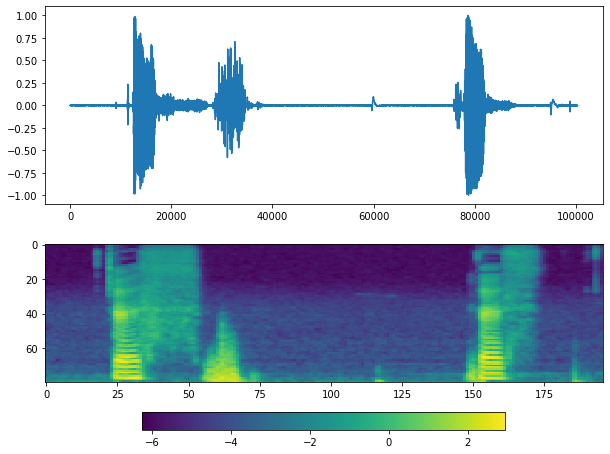

In [8]:
plot(y,sr)

In [9]:
y_int = malaya_speech.astype.float_to_int(y)
audio = AudioSegment(
    y_int.tobytes(),
    frame_rate = sr,
    sample_width = y_int.dtype.itemsize,
    channels = 1
)

In [10]:
audio_chunks = split_on_silence(
    audio,
    min_silence_len = 200,
    silence_thresh = -30,
    keep_silence = 100,
)
audio_chunks

In [11]:
y_ = sum(audio_chunks)
y_ = np.array(y_.get_array_of_samples())
y_ = malaya_speech.astype.int_to_float(y_)

In [12]:
ipd.Audio(y_, rate = sr)

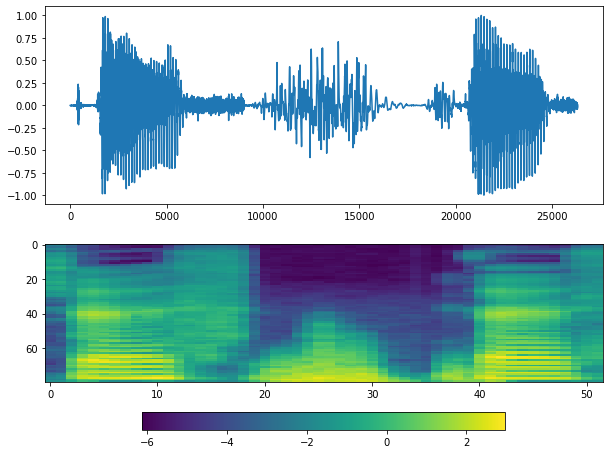

In [13]:
plot(y_, sr)

In [14]:
song = AudioSegment.from_wav('Trim_Test.wav')
a = np.array(song.get_array_of_samples())

In [15]:
f = []
w = 256
for i in range(round(len(a)/w)-1):
    f.append(a[i*w:(i+1)*w-1])
len(f)

102

In [16]:
song2 = AudioSegment.from_wav('Test.wav')
a2 = np.array(song2.get_array_of_samples())

In [17]:
f = []
w = 256
for i in range(round(len(a2)/w)-1):
    f.append(a2[i*w:(i+1)*w-1])
len(f)

2159